In [634]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [635]:
# Download MNIST dataset
dataset = MNIST(root="data/", download=True)

In [636]:
len(dataset)

60000

In [637]:
test_data = MNIST(root="data/", train=False, transform=transforms.ToTensor())
len(test_data)

10000

In [638]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FC5ADF4AB80>, 5)

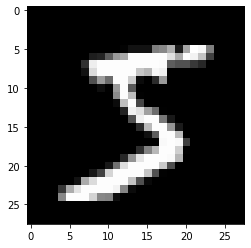

In [639]:
image, label = dataset[0]
plt.imshow(image, cmap="gray")

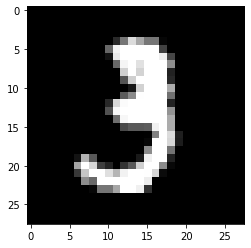

In [640]:
image, label = dataset[10]
plt.imshow(image, cmap="gray")

In [641]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [642]:
'''
The image is now converted to a 1x28x28 tensor.
The first dimension tracks color channels.
The second and third dimensions represent pixels along the height and width of the image, respectively.
Since images in the MNIST dataset are grayscale, there's just one channel.
Other datasets have images with color, in which case there are three channels: red, green, and blue (RGB).
'''
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


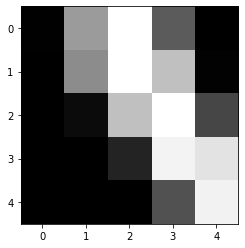

In [643]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [644]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [645]:
?random_split

Signature:
random_split(
    dataset: torch.utils.data.dataset.Dataset[~T],
    lengths: Sequence[int],
    generator: Union[torch._C.Generator, NoneType] = <torch._C.Generator object at 0x7fc614093e10>,
) -> List[torch.utils.data.dataset.Subset[~T]]
Docstring:
Randomly split a dataset into non-overlapping new datasets of given lengths.
Optionally fix the generator for reproducible results, e.g.:

>>> random_split(range(10), [3, 7], generator=torch.Generator().manual_seed(42))

Arguments:
    dataset (Dataset): Dataset to be split
    lengths (sequence): lengths of splits to be produced
    generator (Generator): Generator used for the random permutation.
File:      ~/.local/lib/python3.8/site-packages/torch/utils/data/dataset.py
Type:      function


In [646]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [647]:
input_size = 28*28
number_classes = 10

model = nn.Linear(input_size, number_classes)

In [648]:
print(model.weight)
print(model.weight.shape)

Parameter containing:
tensor([[-0.0309,  0.0350,  0.0298,  ...,  0.0172, -0.0087,  0.0193],
        [-0.0248, -0.0253, -0.0056,  ..., -0.0159, -0.0101, -0.0326],
        [ 0.0341, -0.0176, -0.0296,  ...,  0.0061, -0.0003, -0.0299],
        ...,
        [-0.0220, -0.0266,  0.0154,  ..., -0.0131, -0.0071,  0.0076],
        [ 0.0197,  0.0310, -0.0195,  ..., -0.0129,  0.0153, -0.0140],
        [ 0.0076, -0.0134, -0.0332,  ...,  0.0078,  0.0273, -0.0058]],
       requires_grad=True)
torch.Size([10, 784])


In [649]:
print(model.bias)
print(model.bias.shape)

Parameter containing:
tensor([ 0.0103,  0.0101,  0.0251,  0.0177, -0.0106,  0.0094, -0.0267, -0.0240,
         0.0298,  0.0016], requires_grad=True)
torch.Size([10])


In [650]:
# for images, labels in train_loader:
#     print(images.shape)
#     print(labels)
#     predict = model(images)
#     break

The Above error is because the input was suppose to take an input of 784 size of images but it has taken an input of [100,1,28,28] due to this the model is unable to process its operation.

Defining MnistModel to extend the nn.Module class from Pytorch

In [651]:
'''
xb.reshape(-1, 28*28) indicates to PyTorch that we want a view of the xb tensor with two dimensions.
The length along the 2nd dimension is 28*28 (i.e., 784).
One argument to .reshape can be set to -1 (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.
'''
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, number_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784) # Explaination given above
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [652]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [653]:
'''
Note that the model no longer has .weight and .bias attributes (as they are now inside the .linear attribute),
but it does have a .parameters method that returns a list containing the weights and bias.
'''
print(model.linear.weight.shape)
list(model.parameters())

torch.Size([10, 784])


[Parameter containing:
 tensor([[ 0.0355,  0.0341, -0.0293,  ..., -0.0107,  0.0206,  0.0218],
         [ 0.0270, -0.0139,  0.0132,  ...,  0.0320, -0.0120,  0.0249],
         [ 0.0136, -0.0283,  0.0102,  ..., -0.0103, -0.0150,  0.0045],
         ...,
         [-0.0027,  0.0277,  0.0118,  ..., -0.0125,  0.0206, -0.0041],
         [ 0.0196,  0.0321, -0.0198,  ..., -0.0339, -0.0345, -0.0122],
         [ 0.0267,  0.0245, -0.0150,  ..., -0.0198,  0.0024,  0.0297]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0093, -0.0040, -0.0138,  0.0248,  0.0041,  0.0279, -0.0066,  0.0062,
         -0.0064, -0.0005], requires_grad=True)]

In [654]:
for images, labels in train_loader:
    print(images.shape)
    print(labels)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

'''
For each of the 128 input images, we get 10 outputs, one for each class.
As discussed earlier, we'd like these outputs to represent probabilities.
Each output row's elements must lie between 0 to 1 and add up to 1, which is not the case.

To convert the output rows into probabilities, we use the softmax function
'''

torch.Size([128, 1, 28, 28])
tensor([7, 9, 3, 1, 3, 7, 5, 1, 3, 6, 7, 8, 7, 7, 4, 4, 4, 3, 6, 3, 3, 4, 9, 8,
        4, 8, 4, 2, 6, 4, 8, 9, 3, 4, 3, 8, 0, 7, 5, 3, 3, 3, 5, 5, 8, 2, 7, 0,
        7, 2, 3, 4, 8, 5, 2, 8, 9, 3, 6, 1, 6, 7, 5, 1, 9, 1, 6, 2, 4, 9, 7, 7,
        8, 7, 1, 6, 2, 0, 9, 4, 5, 9, 1, 9, 9, 3, 3, 5, 5, 5, 1, 3, 4, 1, 9, 5,
        0, 0, 0, 5, 5, 3, 1, 1, 9, 0, 0, 7, 5, 8, 4, 0, 9, 7, 2, 2, 1, 4, 1, 3,
        6, 3, 4, 1, 2, 8, 9, 6])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.2879,  0.2657, -0.0300,  0.2693, -0.1041, -0.1257, -0.3794,  0.0169,
          0.3653,  0.0474],
        [ 0.0614,  0.1896, -0.1488,  0.1011,  0.1060, -0.2109, -0.1644, -0.1834,
         -0.1040,  0.3517]])


"\nFor each of the 128 input images, we get 10 outputs, one for each class.\nAs discussed earlier, we'd like these outputs to represent probabilities.\nEach output row's elements must lie between 0 to 1 and add up to 1, which is not the case.\n\nTo convert the output rows into probabilities, we use the softmax function\n"

In [655]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1224, 0.1198, 0.0891, 0.1202, 0.0827, 0.0810, 0.0628, 0.0934, 0.1323,
         0.0963],
        [0.1046, 0.1189, 0.0848, 0.1088, 0.1094, 0.0797, 0.0835, 0.0819, 0.0887,
         0.1398]])
Sum:  0.9999999403953552


In [656]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)

tensor([8, 9, 1, 9, 1, 1, 1, 9, 9, 1, 0, 1, 1, 1, 9, 0, 1, 5, 8, 5, 1, 8, 1, 1,
        2, 1, 1, 1, 9, 0, 9, 4, 5, 5, 1, 8, 8, 3, 1, 1, 5, 2, 9, 8, 1, 1, 3, 0,
        1, 9, 2, 1, 9, 1, 9, 1, 1, 8, 9, 9, 1, 1, 1, 1, 8, 9, 0, 9, 9, 1, 0, 1,
        1, 8, 9, 1, 9, 8, 8, 9, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 9, 1, 9, 9, 8, 5,
        0, 1, 8, 9, 1, 1, 9, 9, 1, 0, 1, 0, 0, 1, 1, 9, 1, 1, 0, 1, 9, 4, 9, 8,
        8, 5, 0, 9, 8, 5, 0, 8])


In [657]:
labels

tensor([7, 9, 3, 1, 3, 7, 5, 1, 3, 6, 7, 8, 7, 7, 4, 4, 4, 3, 6, 3, 3, 4, 9, 8,
        4, 8, 4, 2, 6, 4, 8, 9, 3, 4, 3, 8, 0, 7, 5, 3, 3, 3, 5, 5, 8, 2, 7, 0,
        7, 2, 3, 4, 8, 5, 2, 8, 9, 3, 6, 1, 6, 7, 5, 1, 9, 1, 6, 2, 4, 9, 7, 7,
        8, 7, 1, 6, 2, 0, 9, 4, 5, 9, 1, 9, 9, 3, 3, 5, 5, 5, 1, 3, 4, 1, 9, 5,
        0, 0, 0, 5, 5, 3, 1, 1, 9, 0, 0, 7, 5, 8, 4, 0, 9, 7, 2, 2, 1, 4, 1, 3,
        6, 3, 4, 1, 2, 8, 9, 6])

In [658]:
# Defining a accuracy function
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [659]:
#accuracy(preds, labels)

In [660]:
# accuracy is often used as an evaluation metric for classification, but not as a loss function.
# A commonly used loss function for classification problems is the cross-entropy.
# Unlike accuracy, cross-entropy is a continuous and differentiable function.
# It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss).
# These two factors make cross-entropy a better choice for the loss function.
loss = F.cross_entropy(outputs, labels)

In [661]:
# One way to interpret the resulting number e.g. 2.30 is look at e^-2.30 which is around 0.1 as the predicted probability of the correct label, on average.
# The lower the loss, The better the model.
print(loss)

tensor(2.2745, grad_fn=<NllLossBackward>)


In [662]:
learning_rate = 0.001
opt = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [663]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [664]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [665]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, number_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        #print(outputs)
        batch_accs = [x['val_acc'] for x in outputs]
        #print(batch_accs)
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        #print(epoch_acc)
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [666]:
result0 = evaluate(model, val_loader)
history1 = fit(5, 0.001, model, train_loader, val_loader)
history2 = fit(5, 0.001, model, train_loader, val_loader)
history3 = fit(5, 0.001, model, train_loader, val_loader)
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9706, val_acc: 0.6039
Epoch [1], val_loss: 1.6947, val_acc: 0.7302
Epoch [2], val_loss: 1.4886, val_acc: 0.7708
Epoch [3], val_loss: 1.3330, val_acc: 0.7892
Epoch [4], val_loss: 1.2136, val_acc: 0.8030
Epoch [0], val_loss: 1.1198, val_acc: 0.8109
Epoch [1], val_loss: 1.0448, val_acc: 0.8184
Epoch [2], val_loss: 0.9835, val_acc: 0.8243
Epoch [3], val_loss: 0.9325, val_acc: 0.8289
Epoch [4], val_loss: 0.8894, val_acc: 0.8329
Epoch [0], val_loss: 0.8526, val_acc: 0.8356
Epoch [1], val_loss: 0.8209, val_acc: 0.8390
Epoch [2], val_loss: 0.7930, val_acc: 0.8409
Epoch [3], val_loss: 0.7684, val_acc: 0.8440
Epoch [4], val_loss: 0.7466, val_acc: 0.8464
Epoch [0], val_loss: 0.7271, val_acc: 0.8483
Epoch [1], val_loss: 0.7094, val_acc: 0.8506
Epoch [2], val_loss: 0.6935, val_acc: 0.8518
Epoch [3], val_loss: 0.6789, val_acc: 0.8531
Epoch [4], val_loss: 0.6656, val_acc: 0.8550


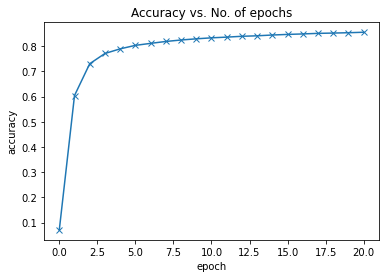

In [667]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

## Testing with individual images

In [668]:
# Define test dataset
test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


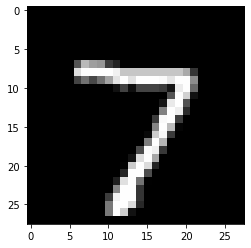

In [669]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [670]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


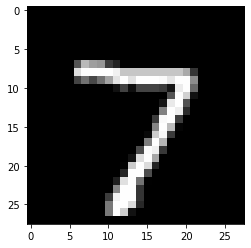

In [671]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


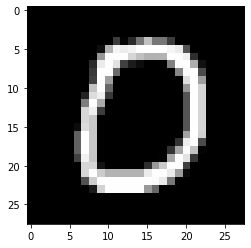

In [672]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


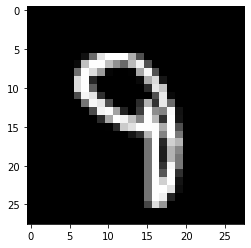

In [673]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


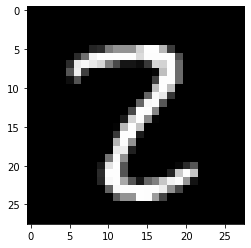

In [674]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [675]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6437196731567383, 'val_acc': 0.8597656488418579}

## Saving and loading the model

In [676]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [677]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0045,  0.0232, -0.0113,  ...,  0.0136,  0.0062, -0.0113],
                      [-0.0193,  0.0141, -0.0065,  ..., -0.0310, -0.0159, -0.0280],
                      [-0.0145, -0.0007,  0.0076,  ...,  0.0244, -0.0343, -0.0145],
                      ...,
                      [-0.0020,  0.0027, -0.0197,  ...,  0.0101, -0.0352, -0.0326],
                      [ 0.0104,  0.0333,  0.0275,  ...,  0.0186,  0.0030, -0.0323],
                      [-0.0179, -0.0306, -0.0005,  ...,  0.0204,  0.0087,  0.0131]])),
             ('linear.bias',
              tensor([-0.0293,  0.0827, -0.0348, -0.0534,  0.0520,  0.0471,  0.0047,  0.0349,
                      -0.0577, -0.0124]))])

In [678]:
model2 = MnistModel()

In [679]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0033, -0.0144,  0.0299,  ...,  0.0140,  0.0306,  0.0347],
                      [-0.0148, -0.0029,  0.0340,  ...,  0.0271,  0.0216,  0.0261],
                      [-0.0285,  0.0154,  0.0295,  ..., -0.0214,  0.0082, -0.0138],
                      ...,
                      [ 0.0296, -0.0163, -0.0281,  ..., -0.0006,  0.0284, -0.0190],
                      [-0.0080,  0.0288, -0.0090,  ...,  0.0106, -0.0182,  0.0175],
                      [-0.0172,  0.0172,  0.0258,  ...,  0.0049, -0.0011,  0.0350]])),
             ('linear.bias',
              tensor([ 0.0235, -0.0180,  0.0186,  0.0264, -0.0014, -0.0108,  0.0357,  0.0074,
                      -0.0101, -0.0043]))])

In [680]:
evaluate(model2, test_loader)

{'val_loss': 2.309016227722168, 'val_acc': 0.10957030951976776}

In [681]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0045,  0.0232, -0.0113,  ...,  0.0136,  0.0062, -0.0113],
                      [-0.0193,  0.0141, -0.0065,  ..., -0.0310, -0.0159, -0.0280],
                      [-0.0145, -0.0007,  0.0076,  ...,  0.0244, -0.0343, -0.0145],
                      ...,
                      [-0.0020,  0.0027, -0.0197,  ...,  0.0101, -0.0352, -0.0326],
                      [ 0.0104,  0.0333,  0.0275,  ...,  0.0186,  0.0030, -0.0323],
                      [-0.0179, -0.0306, -0.0005,  ...,  0.0204,  0.0087,  0.0131]])),
             ('linear.bias',
              tensor([-0.0293,  0.0827, -0.0348, -0.0534,  0.0520,  0.0471,  0.0047,  0.0349,
                      -0.0577, -0.0124]))])

In [682]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6437196731567383, 'val_acc': 0.8597656488418579}